<a href="https://colab.research.google.com/github/tejatammali/Financial-Aid-Analysis/blob/main/Financial_Aid_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install BeautifulSoup4

In [ ]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
from bs4 import BeautifulSoup
import urllib.request
import re
import requests
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from os import path
from PIL import Image
import os

                              University No-loan financial aid for families meeting these eligibility requierment
0                        Amherst College                                      No max income                      
1               Arizona State University                                            Arizona                      
2                        Bowdoin College                                      No max income                      
3                       Brown University                                      No max income                      
4                                Caltech                        Annual income below $60,000                      
5              Claremont McKenna College                                      No max income                      
6                          Colby College                        No max income; all students                      
7                    Columbia University                                      No max inc

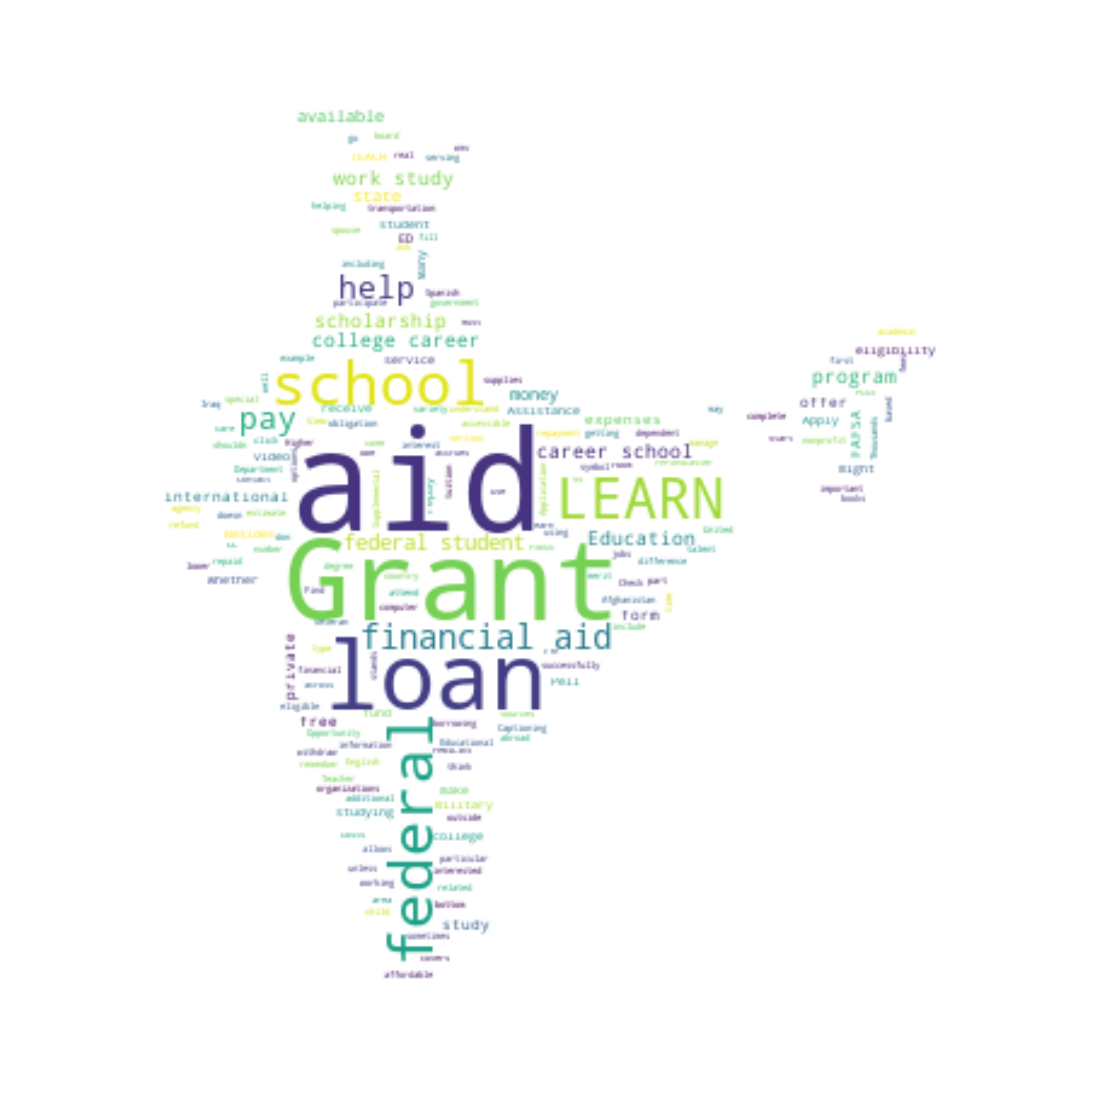

In [ ]:
url = "https://en.wikipedia.org/wiki/Student_financial_aid_(United_States)#Types_of_financial_aid"
page = urllib.request.urlopen(url)
try:
    page = urllib.request.urlopen(url)
except:
    print("An error occured.")
soup = BeautifulSoup(page, 'html.parser')

my_table=soup.find('table',{'class':'wikitable'})
A=[]
B=[]


for row in my_table.findAll('tr'):
    cells = row.findAll('td')
    if len(cells)==2: 
        A.append(cells[0].find(text=True))
        B.append(cells[1].find(text=True).strip('\n'))
 
df=pd.DataFrame()
df['University']=A
df['No-loan financial aid for families meeting these eligibility requierment']=B
print(df)

ur='https://studentaid.gov/understand-aid/types'
r=requests.get(ur)
soup = BeautifulSoup(r.content, 'html.parser') 
para=soup.find_all('p')
i=0
text=''
for i in range(len(para)):
  if para[i].text and para[i].text.strip():
    
    text=text+para[i].text+'\n'
for i in "'!@_-,./?:;'""":
    text = text.replace(i, ' ')
for i in '"':
    text = text.replace(i, ' ')
text=text.replace("share link", " ")
mask=np.array(Image.open(requests.get('https://miro.medium.com/max/900/1*w06eGRbeB7lili3q_45T_g.png',stream=True).raw))
wc=WordCloud(background_color="white",mask=mask).generate(text)
plt.figure(figsize=(20,20))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()




In [ ]:
from google.colab import files

uploaded = files.upload()

Saving STATE.xls to STATE.xls
Saving STUDENT.xls to STUDENT.xls
Saving STUDENT2.xls to STUDENT2.xls


In [ ]:
df=pd.read_excel('STUDENT.xls')
df
df_a=df.rename(columns=df.iloc[2]).iloc[5:7]
df_a.columns=['gender','2016-Q1','2017-Q2','2017-Q3','2017-Q4','2017-Q5','2018-Q6','2018-Q7','TOTAL1','TOTAL2']
data=df_a.drop(['TOTAL1','TOTAL2','2016-Q1','2017-Q5'],axis='columns').set_index('gender')
data=data.T
d=pd.read_excel('STUDENT2.xls')
d_c=d.rename(columns=df.iloc[2]).iloc[5:7]
d_c.columns=['gender','2016-Q1','2016-Q2','2016-Q3','2016-Q4','2017-Q5','2017-Q6','Q7','TOTAL1']
data_a=d_c.drop(['TOTAL1','Q7'],axis='columns').set_index('gender')
data_a=data_a.T
frames = [data,data_a]

result = pd.concat(frames,sort=False)
a=result.iloc[0:3]
b=result.iloc[9:11]
c=result.iloc[5:9]
d=result.iloc[3:5]
e=[c,a,b,d]
result_a = pd.concat(e,sort=False)
female=result_a['Female'].values.tolist()
print(female)
male=result_a['Male'].values.tolist()

time=['2016-Q1','2016-Q2','2016-Q3','2016-Q4','2017-Q2','2017-Q3','2017-Q4','2017-Q5','2017-Q6','2018-Q6','2018-Q7']
trace0 = go.Scatter(x=time, y=female, 
                    name="female", 
                    mode="lines+markers")   


trace1 = go.Scatter(x=time, y=male, 
                    name="Male", 
                    mode="lines+markers")  

mydata = go.Data([trace0, trace1])

mylayout = go.Layout(
    title="The Numbers of Financial Aid Apllication between Genders Between 2016 to 2018",
    xaxis_title="Quarter",
    yaxis_title="Number of Free Financial Aid Application",
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="#7f7f7f")
)


fig = go.Figure(data=mydata, layout=mylayout)

fig.show()

df_b=df.rename(columns=df.iloc[2]).iloc[9:13]
df_b.columns=['age','Q1','Q2','Q3','Q4','Q5','Q6','Q7','TOTAL1','TOTAL2']
data_a=df_b.drop(['TOTAL1','TOTAL2'],axis='columns').set_index('age')
data_a=data_a.T

import plotly.graph_objects as go
t=['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7']

fig = go.Figure(data=[
    go.Bar(name='18 or Less', x=t, y=data_a['18 or Less'],marker_color='lime'),
    go.Bar(name='19 through 24', x=t, y=data_a['19 through 24'],marker_color='aqua'),
    go.Bar(name='25 or Greater', x=t, y=data_a['25 or Greater'],marker_color='gold'),
    go.Bar(name='Age Unknown', x=t, y=data_a['Age Unknown'],marker_color='salmon'
          )])

fig.update_layout(barmode='stack'
                  ,
    title="Number of Financial Aid Application Through Differnent Age Group",
    xaxis_title="Quarter",
    yaxis_title="Number of Free Application from 2017-2018",
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="#7f7f7f"))
fig.show()

[5008027, 3061786, 1978012, 591122, 3015893, 2227392, 1731193, 478849, 252097, 445336, 240077]


/usr/local/lib/python3.6/dist-packages/plotly/graph_objs/_deprecations.py:40: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.




In [ ]:
pip install geopandas

In [ ]:
pip install geopy

In [ ]:
import pandas as pd
from geopy.extra.rate_limiter import RateLimiter
from geopy.geocoders import Nominatim

In [ ]:
# Here is my work for extra credit

datafile = pd.read_excel('STATE.xls')
datafile=datafile.iloc[5:]
datafile.columns=['states','dep student','indep student','a','b','c','d']
datafile=datafile.drop(['a','b','c','d'],axis='columns')

locator = Nominatim(user_agent='"myGeocoder"')
geocode = RateLimiter(locator.geocode, min_delay_seconds=1)
datafile['location'] = datafile['states'].apply(geocode)
datafile['point'] = datafile['location'].apply(lambda loc: tuple(loc.point) if loc else None)
datafile[['latitude', 'longitude', 'altitude']] = pd.DataFrame(datafile['point'].tolist(), index=datafile.index)
datafile["dep student"] = pd.to_numeric(datafile["dep student"])
datafile = datafile.sort_values(['dep student']).reset_index(drop=True)

datafile

,states,dep student,indep student,location,point,latitude,longitude,altitude
0,Northwest Territories,0,0,"(Northwest Territories, Canada, (65.0000004, -...","(65.0000004, -118.0, 0.0)",65.000000,-118.000000,0.0
1,Yukon,1,3,"(Yukon, Canada, (63.000147, -136.002502))","(63.000147, -136.002502, 0.0)",63.000147,-136.002502,0.0
2,Nunavut,1,1,"(Nunavut, Canada, (70.0000073, -90.0))","(70.0000073, -90.0, 0.0)",70.000007,-90.000000,0.0
3,Prince Edward Island,2,3,"(Prince Edward Island, Queens County, Prince E...","(46.503545349999996, -63.595517139914485, 0.0)",46.503545,-63.595517,0.0
4,Labrador,4,0,"(Labrador, Newfoundland and Labrador, Canada, ...","(55.9266344, -61.88499184409646, 0.0)",55.926634,-61.884992,0.0
...,...,...,...,...,...,...,...,...
72,Pennsylvania,84936,60857,"(Pennsylvania, United States of America, (40.9...","(40.9699889, -77.7278831, 0.0)",40.969989,-77.727883,0.0
73,Florida,88012,128952,"(Florida, United States of America, (27.756766...","(27.7567667, -81.4639835, 0.0)",27.756767,-81.463983,0.0
74,New York,140664,96545,"(New York, United States of America, (40.71272...","(40.7127281, -74.0060152, 0.0)",40.712728,-74.006015,0.0
75,Texas,154510,170238,"(Texas, United States of America, (31.8160381,...","(31.8160381, -99.5120986, 0.0)",31.816038,-99.512099,0.0


In [ ]:
datafile['text'] = datafile['states'] + '<br>Dependent Student:' + (datafile['dep student']).astype(str)+ '<br>Independent Student:' + (datafile['indep student']).astype(str)

limits = [(0,16),(16,37),(37,64),(64,78)]
colors = ["tomato","cyan","lightpink","violet"]
name = ['Dependent Student Number less than 100','Dependent Student Number between 100 and 10000','Dependent Student Number between 10000 and 50000','Dependent Student Number over 50000']
scale = 500

fig = go.Figure()
for i in range(len(limits)):
    lim = limits[i]
    datafile_sub = datafile[lim[0]:lim[1]]
    fig.add_trace(go.Scattergeo(
        locationmode = 'USA-states',
        lon = datafile_sub['longitude'],
        lat = datafile_sub['latitude'],
        text = datafile_sub['text'],
        marker = dict(
            size = datafile_sub['dep student']/scale,
            
            color = colors[i],
            line_color='rgb(40,40,40)',
            line_width=0.5,
            sizemode = 'area'
        ),
        name = '{}'.format(name[i])))

fig.update_layout(
        title_text = 'NUMBER OF FAFSA APPLICATIONS PROCESSED IN Q2, Dependent and Independent Students for Each State',
        showlegend = True,
        geo = dict(
            scope = 'usa',
            landcolor = 'rgb(217, 217, 217)',
        )
    )

fig.show()

In [ ]:
import pandas as pd
import numpy as np

%matplotlib inline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [ ]:
df = pd.read_excel('2018_2019App_Data_by_State_Q1.xls', skiprows=5)
df2 = pd.read_excel('2018_2019App_Data_by_State_Q2.xls', skiprows=5)
df3 = pd.read_excel('2018_2019App_Data_by_State_Q3.xls', skiprows=5)

In [ ]:
num = df['Award Year To Date Total'].tolist()
num.append(0)
print(len(num))

num2 = df2['Award Year To Date Total'].tolist()
print(len(num2))

num3 = df3['Award Year To Date Total'].tolist()
print(len(num3))

statenum = df2['State'].tolist()
print(len(statenum))

In [ ]:
dataset = pd.DataFrame(index=[statenum])
dataset['Q1 Awarded'] = num
dataset['Q2 Awarded'] = num2
dataset['Q3 Awarded'] = num3

In [ ]:
dataset2 = dataset[["Q1 Awarded", "Q2 Awarded", "Q3 Awarded"]]
dataset2.max().head(5).plot(kind='bar', subplots=True)

Text(0.5, 1.0, 'Awards Given')

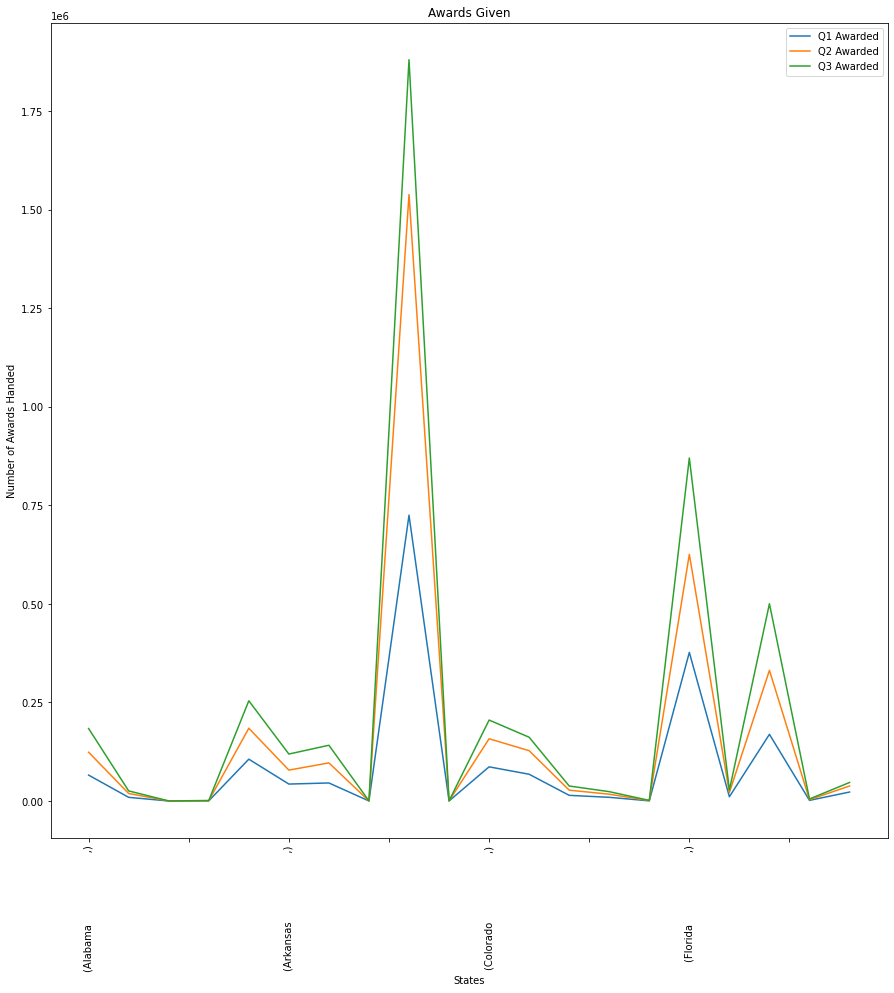

In [ ]:
dataset.head(20).plot(subplots=False, figsize=(15, 15));
plt.xticks(rotation=90)
plt.xlabel("States")
plt.ylabel("Number of Awards Handed")
plt.title('Awards Given')

In [ ]:
newdataset = pd.DataFrame(index=['Totals Across All State'])

In [ ]:
newdataset['Q1 Sum'] = dataset['Q1 Awarded'].sum()
newdataset['Q2 Sum'] = dataset['Q2 Awarded'].sum()
newdataset['Q3 Sum'] = dataset['Q3 Awarded'].sum()


In [ ]:
newdataset

,Q1 Sum,Q2 Sum,Q3 Sum
Totals Across All State,5646162,10400662,13814465


In [ ]:
mdata = df
mdata2 = df3
mdata

In [ ]:
merger = pd.merge(mdata, mdata2, how='right', on='State')
merger

,State,Dependent Students_x,Independent Students_x,Quarterly Total_x,Dependent Students.1_x,Independent Students.1_x,Award Year To Date Total_x,Dependent Students_y,Independent Students_y,Quarterly Total_y,Dependent Students.1_y,Independent Students.1_y,Award Year To Date Total_y
0,Alabama,36224.0,29495.0,65719.0,36224.0,29495.0,65719.0,23290,36866,60156,87643,96228,183871
1,Alaska,4486.0,4817.0,9303.0,4486.0,4817.0,9303.0,2187,4352,6539,10988,14660,25648
2,Alberta,45.0,18.0,63.0,45.0,18.0,63.0,29,32,61,134,78,212
3,American Samoa,220.0,148.0,368.0,220.0,148.0,368.0,255,232,487,737,548,1285
4,Arizona,58305.0,47872.0,106177.0,58305.0,47872.0,106177.0,23700,45947,69647,115112,139146,254258
...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,West Virginia,13435.0,10452.0,23887.0,13435.0,10452.0,23887.0,5178,9851,15029,34858,33229,68087
73,Wisconsin,60894.0,31727.0,92621.0,60894.0,31727.0,92621.0,19601,27922,47523,117097,89030,206127
74,Wyoming,3737.0,3360.0,7097.0,3737.0,3360.0,7097.0,1700,3148,4848,8125,10099,18224
75,Yukon,1.0,12.0,13.0,1.0,12.0,13.0,8,12,20,14,29,43


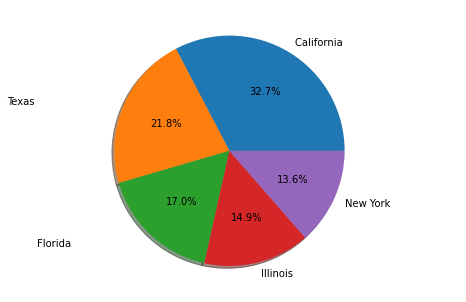

In [ ]:
piedf = df.sort_values(by='Award Year To Date Total',ascending=False).head()

fig = plt.figure()
dep = piedf['Award Year To Date Total']
stat = piedf['State']
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('equal')
ax.pie(dep, labels = stat, autopct='%1.1f%%', shadow=True)
plt.show()
# Pie Chart of top 5 states that were awarded the most aid

In [ ]:
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
import collections


from wordcloud import WordCloud, STOPWORDS

In [ ]:
words = df['State'].tolist()
newwords = [num.strip() for num in words]
print(newwords)

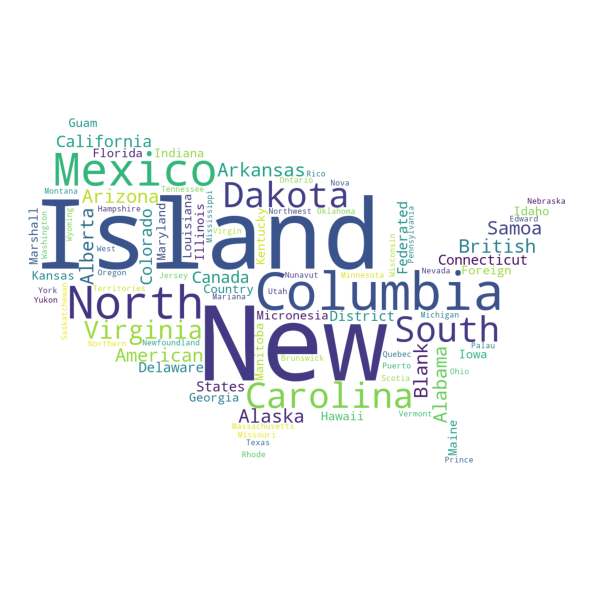

In [ ]:
import urllib
import requests

mask = np.array(Image.open(requests.get('https://png.pngtree.com/png-clipart/20190629/original/pngtree-stereo-simple-silver-american-map-png-image_4118608.jpg', stream=True).raw))

word_cloud = WordCloud(width = 512, height = 512, background_color='white', stopwords=STOPWORDS, mask=mask).generate(unique_string)
plt.figure(figsize=(10,8),facecolor = 'white', edgecolor='blue')
plt.imshow(word_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import xlrd
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
loc = ("/content/student.xls") 

# To open Workbook 
wb = xlrd.open_workbook(loc) 
sheet = wb.sheet_by_index(0)

#degree type
labels_raw = sheet.col_values(0)
labels = labels_raw[25:]
labels = labels[:10]
#print(labels)

#q1
quarterOne = sheet.col_values(1)
one = quarterOne[25:]
one = one[:10]
#print(one)

#q2
quarterTwo = sheet.col_values(2)
two = quarterTwo[25:]
two = two[:10]
#print(two)

#q3
quarterThree = sheet.col_values(3)
three = quarterThree[25:]
three = three[:10]
#print(three)

#q4
quarterFour = sheet.col_values(4)
four = quarterFour[25:]
four = four[:10]
#print(four)

#q5
quarterFive = sheet.col_values(5)
five = quarterFive[25:]
five = five[:10]
#print(five)

#q6
quarterSix = sheet.col_values(6)
six = quarterSix[25:]
six = six[:10]
#print(six)

#q7
quarterSeven = sheet.col_values(7)
seven = quarterSeven[25:]
seven = seven[:10]
#print(seven)

#total
values_raw = sheet.col_values(8)
values = values_raw[25:]
values = values[:10]
#print(values)


In [ ]:
import plotly.express as px
df = pd.DataFrame({'Degree Type':labels,
                         'Q1':one,
                         'Q2':two,
                         'Q3':three,
                         'Q4':four,
                         'Q5':five,
                         'Q6':six,
                         'Q7':seven,
                         'Total Number of People':values,})
fig = px.bar(df, 
             x="Degree Type", 
             y="Total Number of People", 
             hover_data=['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7'],
             title = "Number of People Who Recieved Aid Varying on the Degree Type From Years 2016-2018", 
             color="Degree Type", 
             barmode="stack")
fig.show() 

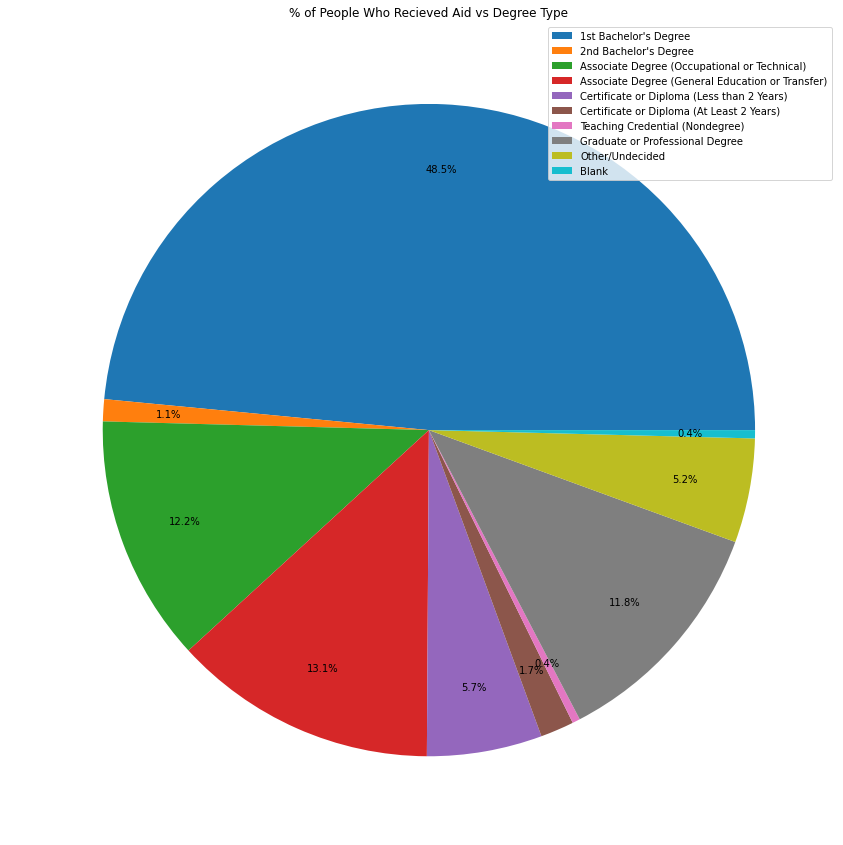

In [ ]:
#circle graph
dfTwo = pd.DataFrame({' ': values}, index=labels)
plot = dfTwo.plot.pie(y=' ', figsize=(15, 15), title="% of People Who Recieved Aid vs Degree Type", labels=None, autopct='%.1f%%', pctdistance=.8)

In [ ]:
import plotly.graph_objects as go

headerColor = 'grey'
rowEvenColor = 'lightgrey'
rowOddColor = 'white'

fig = go.Figure(data=[go.Table(
  header=dict(
    values=['<b>Degree Pursuing</b>','<b>1st Bachelors Degree</b>','<b>2nd Bachelors Degree</b>','<b>Associate Degree (Occupational or Technical)</b>',
            '<b>Associate Degree (General Education or Transfer)</b>','<b>Certificate or Diploma (Less than 2 Years)</b>',
            '<b>Certificate or Diploma (At Least 2 Years)</b>','<b>Teaching Credential (Nondegree)</b>',
            '<b>Graduate or Professional Degree</b>','<b>Other/Undecided</b>','<b>Blank</b>'],
    line_color='darkslategray',
    fill_color=headerColor,
    align=['left','center'],
    font=dict(color='white', size=12)
  ),
  cells=dict(
    values=[
      ['Q1', 
       'Q2', 
       'Q3', 
       'Q4',
       'Q5',
       'Q6',
       'Q7+'
       ],
      
      [3229784, 2671579, 1565893, 1104595, 291402, 223330, 110988], 
      [46875, 50593,	44104,	34898,	14537,	10556,	5161], 
      [523284, 510064, 509929,	452820, 146595,	116607,	61303],
      [617567, 578681,	516194,	477981,	134646,	105029,	53393], 
      [149683, 199971,	224996,	227670,	110870,	108607,	60806],
      [69307,	67970, 67495, 64415, 20725, 16456, 8779],
      [13246,	18007, 14502, 14111, 5203, 4495,	2897],
      [489536, 634925,	506073, 348338,	112106,	91740, 51043],
      [262563, 237563, 177931, 176564, 56072, 44599,	24665],
      [17473,	15972, 14236, 14607,	6613,	5527,	2871]],

    
    line_color='darkslategray',
    # 2-D list of colors for alternating rows
    fill_color = [[rowOddColor,rowEvenColor,rowOddColor, rowEvenColor,rowOddColor]*5],
    align = ['left', 'center'],
    font = dict(color = 'darkslategray', size = 11)
    ))
])
fig.show()

In [ ]:
totalSum = pd.DataFrame({'Degree Type':labels})
totalSum['Overall Total # of People Who Received Aid'] = df['Total Number of People']
totalSum

,Degree Type,Overall Total # of People Who Received Aid
0,1st Bachelor's Degree,9197571.0
1,2nd Bachelor's Degree,206724.0
2,Associate Degree (Occupational or Technical),2320602.0
3,Associate Degree (General Education or Transfer),2483491.0
4,Certificate or Diploma (Less than 2 Years),1082603.0
5,Certificate or Diploma (At Least 2 Years),315147.0
6,Teaching Credential (Nondegree),72461.0
7,Graduate or Professional Degree,2233761.0
8,Other/Undecided,979957.0
9,Blank,77299.0


In [ ]:
totalDescribe = pd.DataFrame({'Degree Type':labels,
                         'Q1':one,
                         'Q2':two,
                         'Q3':three,
                         'Q4':four,
                         'Q5':five,
                         'Q6':six,
                         'Q7':seven,
                         'Total Number of People':values,})
print("Statistics are printed below for the total # of people for who received aid for each degree: \n--------------------------")
df['Total Number of People'].describe()

Statistics are printed below for the total # of people for who received aid for each degree: 
--------------------------


count    1.000000e+01
mean     1.896962e+06
std      2.737373e+06
min      7.246100e+04
25%      2.338298e+05
50%      1.031280e+06
75%      2.298892e+06
max      9.197571e+06
Name: Total Number of People, dtype: float64

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

plt.pie(
    (10,2),
    labels=('First-time application','Renewal'),
    shadow=True,
    colors=('yellowgreen', 'lightskyblue'),
    explode=(0,0.15), # space between slices 
    startangle=90,    # rotate conter-clockwise by 90 degrees
    autopct='%1.1f%%',# display fraction as percentage
    )
plt.legend(fancybox=True)
plt.axis('equal')     # plot pyplot as circle
plt.tight_layout()
plt.xlabel("Statistics on the Average Applications for Federal Aid ")
plt.show()


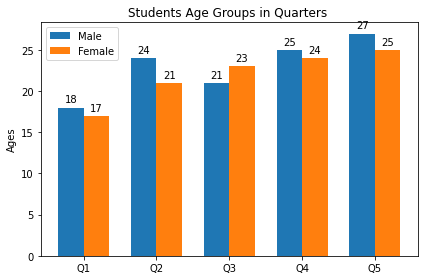

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

labels = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5']
men_means = [18, 24, 21, 25, 27]
women_means = [17, 21, 23, 24, 25]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Male')
rects2 = ax.bar(x + width/2, women_means, width, label='Female')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Ages')
ax.set_title('Students Age Groups in Quarters ')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()






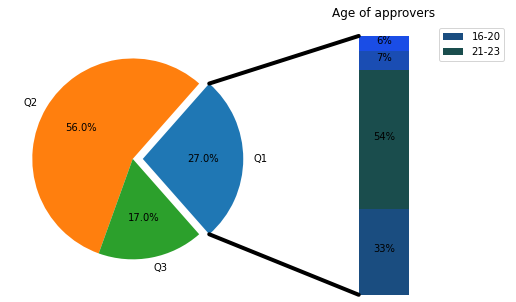

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
import numpy as np

# make figure and assign axis objects
fig = plt.figure(figsize=(9, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
fig.subplots_adjust(wspace=0)

# pie chart parameters
ratios = [.27, .56, .17]
labels = ['Q1', 'Q2', 'Q3']
explode = [0.1, 0, 0]
# rotate so that first wedge is split by the x-axis
angle = -180 * ratios[0]
ax1.pie(ratios, autopct='%1.1f%%', startangle=angle,
        labels=labels, explode=explode)

# bar chart parameters

xpos = 0
bottom = 0
ratios = [.33, .54, .07, .06]
width = .2
colors = [[.1, .3, .5], [.1, .3, .3], [.1, .3, .7], [.1, .3, .9]]

for j in range(len(ratios)):
    height = ratios[j]
    ax2.bar(xpos, height, width, bottom=bottom, color=colors[j])
    ypos = bottom + ax2.patches[j].get_height() / 2
    bottom += height
    ax2.text(xpos, ypos, "%d%%" % (ax2.patches[j].get_height() * 100),
             ha='center')

ax2.set_title('Age of approvers')
ax2.legend(('16-20', '21-23', ))
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

# use ConnectionPatch to draw lines between the two plots
# get the wedge data
theta1, theta2 = ax1.patches[0].theta1, ax1.patches[0].theta2
center, r = ax1.patches[0].center, ax1.patches[0].r
bar_height = sum([item.get_height() for item in ax2.patches])

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(4)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(4)

plt.show()


In [ ]:
from google.colab import files

uploaded = files.upload()

Saving mike.xlsx to mike (5).xlsx


In [ ]:

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from matplotlib import pyplot as plt
import numpy as np
import requests


In [ ]:
import urllib
import json
from bs4 import BeautifulSoup


df=pd.read_excel('mike.xlsx')
df.columns=['State','Dependent Students','Independent Students','Quarterly Total','Dependent Students','Independent Studentsl','Award Year To Date Total''']
df

,State,Dependent Students,Independent Students,Quarterly Total,Dependent Students,Independent Studentsl,Award Year To Date Total
0,Manitoba,9,7,16,15,10,25
1,Marshall Islands,49,42,91,89,91,180
2,Maryland,45426,45039,90465,114046,83886,197932
3,Massachusetts,56795,36755,93550,135166,66506,201672
4,Mexico,5301,77,5378,12179,175,12354
5,Michigan,77608,58427,136035,181113,113315,294428
6,Minnesota,33524,24321,57845,84734,45176,129910
7,Mississippi,18630,18152,36782,42919,35698,78617
8,Missouri,36923,34028,70951,97260,67243,164503
9,Montana,3270,4696,7966,12093,10278,22371


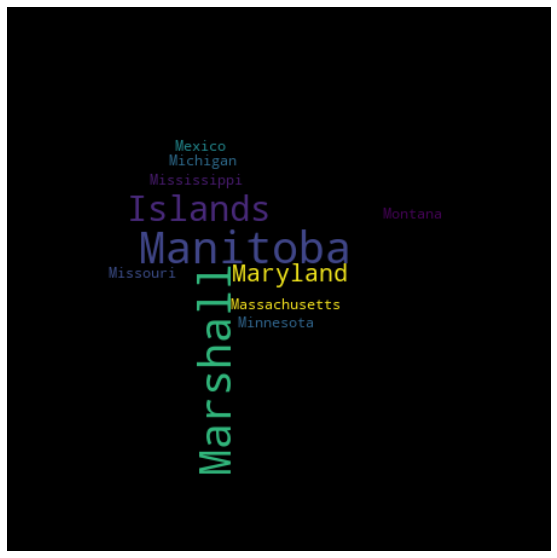

In [ ]:
a=''
for i in df['State']:
  a=a+str(i)+' '

mask=np.array(Image.open(requests.get('https://miro.medium.com/max/900/1*w06eGRbeB7lili3q_45T_g.png',stream=True).raw))
wordcloud = WordCloud(mask = mask).generate(a)

# Display the generated image:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
ur='https://studentaid.gov/understand-aid/types/scholarships#types'
r=requests.get(ur)
soup = BeautifulSoup(r.content, 'html.parser') 
para=soup.find_all('p')
i=0
text=''
for i in range(len(para)):
  if para[i].text and para[i].text.strip():
    
    text=text+para[i].text+'\n'
print(text)

Start researching early, and meet deadlines, and you may be on your way to scholarship success.
Scholarships are gifts. They don't need to be repaid. There are thousands of them, offered by schools, employers, individuals, private companies, nonprofits, communities, religious groups, and professional and social organizations.
What kinds of scholarships are available?How do I find scholarships?When do I apply for scholarships?How do I apply for scholarships?How do I get my scholarship money?How does a scholarship affect my other student aid?
Some scholarships for college are merit-based. You earn them by meeting or exceeding certain standards set by the scholarship-giver. Merit scholarships might be awarded based on academic achievement or on a combination of academics and a special talent, trait, or interest. Other scholarships are based on financial need.
Many scholarships are geared toward particular groups of people; for instance, there are scholarships for women or graduate student